  ## Task 2 - Prediction Using Unsupervised Machine Learning

In [310]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline

### Reading dataset from URL

In [347]:
Dataset = pd.read_csv("Iris.csv")
Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [348]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [346]:
df = Dataset.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [315]:
df.duplicated().sum()

3

In [316]:
df.drop_duplicates(inplace=True)
df.shape[0]

147

In [342]:
df.isnull().sum()

SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
Cluster            0
Species_encoded    0
dtype: int64

In [344]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,Species_encoded
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844,1.068027,0.993197
std,0.829100,0.426331,1.759111,0.757874,0.764449,0.815069
min,4.300000,2.050000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.050000,6.900000,2.500000,2.000000,2.000000


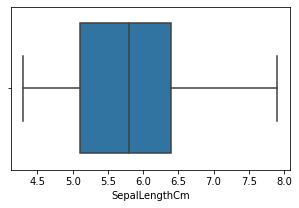

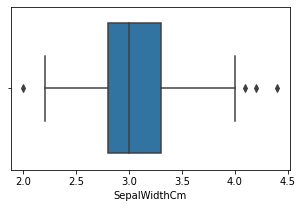

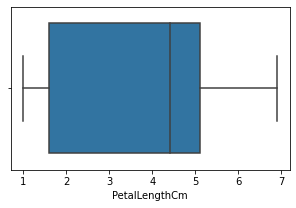

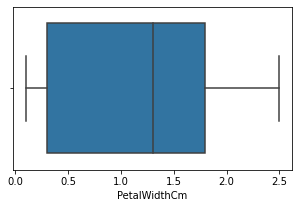

In [317]:
# Check for any outliers in numerical data
for i in df.columns:
    if  df[i].dtype == 'float64':
        plt.figure(figsize=(5,3))
        sns.boxplot(df[i])
        plt.show()

###### Here only sepalwidth column has the outlier So we need to treat the outlier

In [318]:
## Treat the outlier in sepalwidth column

Q1,Q3 = np.percentile(df['SepalWidthCm'],[25,75])
IQR = Q3 - Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
   
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence
                                             else lower_fence if x<lower_fence else x)      

<AxesSubplot:xlabel='SepalWidthCm'>

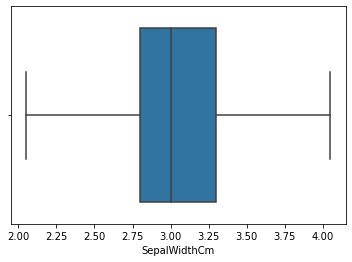

In [319]:
sns.boxplot(df['SepalWidthCm'])

##### Now the outliers are removed from numerical column - Sepalwidthcm

### Understanding the data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

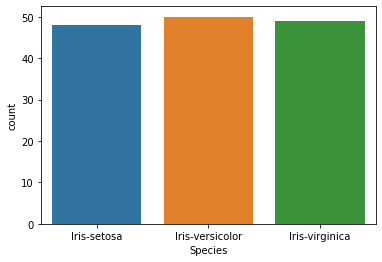

In [320]:
## Taking the target class
print(df.Species.value_counts())
sns.countplot(df.Species)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.110155       0.871305      0.817058
SepalWidthCm       -0.110155      1.000000      -0.420140     -0.355139
PetalLengthCm       0.871305     -0.420140       1.000000      0.961883
PetalWidthCm        0.817058     -0.355139       0.961883      1.000000


<AxesSubplot:>

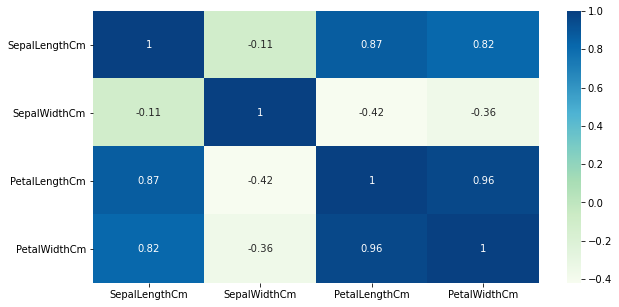

In [323]:
corr = df.corr()
print(corr)
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap='GnBu',annot=True)

### Modelling

#### K-Means Clustering


In [324]:
X = df.iloc[:,[0,1,2,3]]

In [325]:
from sklearn.cluster import KMeans

## Find the no of clusters using Elbow curve and WCSS
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

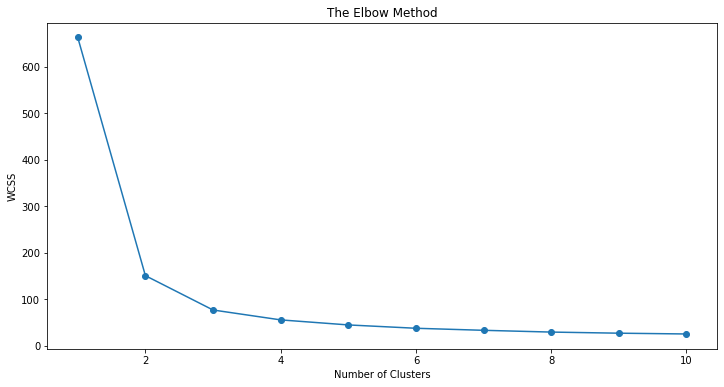

In [326]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

###### In the above graph, we can see that optimum no of clusters for this problem is 3

In [327]:
kmeans = KMeans(n_jobs=-1, n_clusters=3, init='k-means++')
kmeans.fit(X)
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.90327869, 2.75      , 4.38196721, 1.42622951],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ]])

In [328]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [329]:
df['Cluster'] = kmeans.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


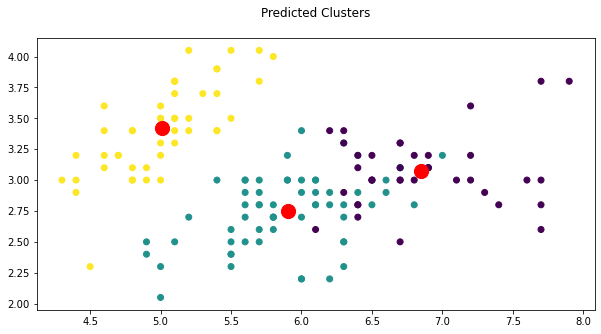

In [330]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,5))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df.Cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label= 'Centroids')
plt.show()


In [331]:
display(df['Cluster'].value_counts(), df['Species'].value_counts())

1    61
2    48
0    38
Name: Cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

##### In the above we can see that, there are slight changes in the prediction about species type

In [332]:
df.loc[df['Species']=='Iris-setosa']['Cluster'].value_counts() #the model has identified iris-setosa with 100% accuracy

2    48
Name: Cluster, dtype: int64

In [333]:
df.loc[df['Species']=='Iris-versicolor']['Cluster'].value_counts()

1    48
0     2
Name: Cluster, dtype: int64

In [334]:
df.loc[df['Species']=='Iris-virginica']['Cluster'].value_counts()

0    36
1    13
Name: Cluster, dtype: int64

So the other two species are not identified with 100% accurancy

##### Uses lambda function to label encoded the given species here

In [335]:
df['Species_encoded'] = df['Species'].apply(lambda x:2 if x=='Iris-setosa' else 0 if x=='Iris-virginica' else 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,2,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2,2
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,1,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0


## Performance and Evaluation of Model

In [336]:
from sklearn.metrics import classification_report
print(classification_report(df['Species_encoded'],df['Cluster']))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        49
           1       0.79      0.96      0.86        50
           2       1.00      1.00      1.00        48

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



<AxesSubplot:>

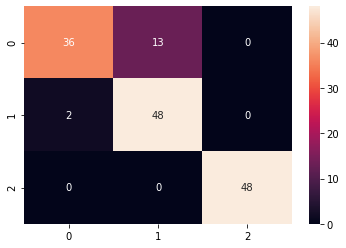

In [337]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(df['Species_encoded'],df['Cluster']),annot=True)

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!END!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!